# Biodiversity Analysis #

## Introduction

The goal of this project is to analyze biodiversity data from the National Park Service, particularly around various species observed in different national park locations. 

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis. 

Here are some questions that this project has sought to answer:
* What is the distribution of conservation status for species?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which animal is mos prevalent and what is their distribution amongst parks?

**Data Sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping 

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed: 

* What is the distribution of conservation status for species?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which animal is mos prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has obeservations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data vizualisation techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:

1. Distributions
1. Ccounts
1. Relationship between species
1. Conservation status of species
1. Observations of species in parks. 


### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

## Import Python Modules

First, import the primary modules that will be used in this project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Data

To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv` and `Species_info.csv` are read in as `DataFrames` called `obs_df` and `species_df` respectively. The newly created `DataFrames` are glimpsed with `.head()` to check its contents.

#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
* **categor** - The category of taxonom of each species
* **scientific_name** - The scientific name of each species
* **common_names** - The common names of each species
* **conservation_status** - The species conservation status

In [127]:
species_df = pd.read_csv('species_info.csv')
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### observations

The `observations.csv` contains information from recorded sightings of different species throughout the national parks inthe past 7 days. The columns included are:

* **scientific_name** - The scientific name of each species
* **park_name** - The name of the national park
* **observations** - The number of observations in the past 7 days

In [6]:
obs_df = pd.read_csv('observations.csv')
obs_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Characteristics

Next, there will be a check for the dimensions of the data sets, for `species` there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [128]:
print(f'species shape: {species_df.shape}')
print(f'observations shape: {obs_df.shape}')

species shape: (5824, 4)
observations shape: (23296, 3)


## Explore the Data

### species 

Let's explore the `species` a little more in depth. The first thing to find the number of disticnt species in the data. Using the `scientific_name` will give us 5,541 unique species.  

In [129]:
f"number of species: {species_df.scientific_name.nunique()}"

'number of species: 5541'

Next is to find the number of `category`that are represented in the data and theere are 7 including animals and plants.

In [131]:
print(f'number of categories: {species_df.category.nunique()}')
print(f'categories: {species_df.category.unique()}')

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Let's dive deeper and see the count of the `category` in data. Vascular plants are by far the largest share of species with 4,470 in the data with reptiles being he fewest with 79.

In [132]:
(species_df.groupby('category').size())

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Another column to explore is the `conservation_status`. This column has foru categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery` and `nan` values.

In [139]:
print(f"number of conservation statuses: {species_df.conservation_status.nunique()}")
print(f"unique consevation statuses: {species_df.conservation_status.unique()}")

number of conservation statuses: 4
unique consevation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Next a count of the number of observations in the breakdown of the categories in `conservations_status` is done. There are 5,633 `nan`values which means that they are species without concerns. On the other hand there are 161 species of concern, 16, edangere, 10 threatened, and 4 in recovery.

In [142]:
print(f"na values: {species_df.conservation_status.isna().sum()}")

species_df.groupby('conservation_status').size()

na values: 5633


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

### observations

The fowllowing section looks at `observations` data. The first task is to check the number of parks that are in the dataset and there are only 4 national parks.

In [143]:
print(f"number of parks: {obs_df.park_name.nunique()}")
print(f"unique parks: {obs_df.park_name.unique()}")

number of parks: 4
unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Here are the total number of observations logged in the parks, there are 3,314,739 sightings in the last 7 days...

In [144]:
f"number of observations: {obs_df.observations.sum()}"

'number of observations: 3314739'

## Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [147]:
(species_df
 .fillna('No Intervention')
 .reset_index(drop=True)
 .groupby('conservation_status')
 .size()
)

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. There is both the table and chart to explore below.

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals. 

In [166]:
conservationCategory = (species_df
 .fillna('No Intervention')
 .reset_index(drop=True)
 .loc[lambda df_: df_.conservation_status != 'No Intervention']
 .groupby(['conservation_status', 'category'])['scientific_name']
 .count()
 .unstack()
)
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


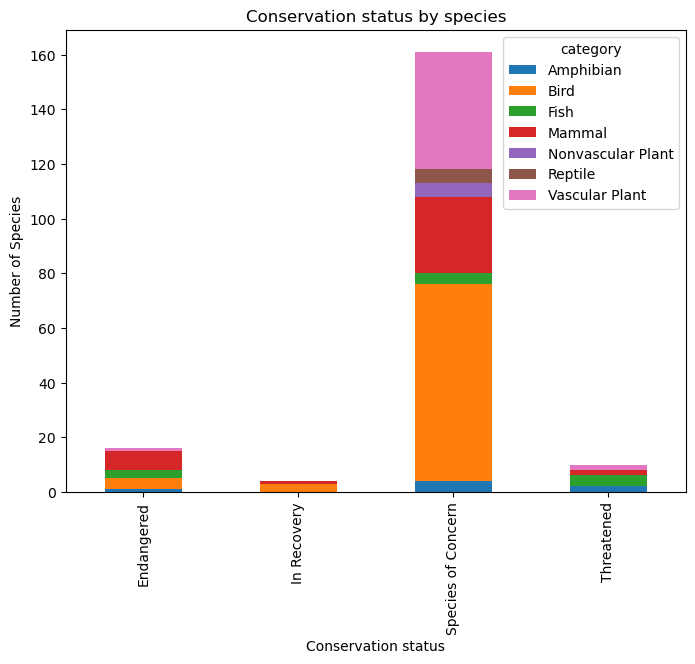

In [171]:
ax = conservationCategory.plot(kind='bar',
                          figsize=(8,6),
                          stacked=True,
                          title='Conservation status by species',
                          xlabel='Conservation status',
                          ylabel='Number of Species'
                        );

#### In conservation

The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`. 

Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

Absolute numbers are not always the most useful statistic, therefore it's important to calculate the rate of protection that each `category` exhibits in the data. From this analysis, one can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds. 

In [288]:
category_counts = (species_df
 .fillna('No Intervention')
 .reset_index(drop=True)
 .assign(
     is_protected = lambda df_: df_.conservation_status != 'No Intervention'
 )
# we group by `category` and `is_protected` to show the break down of each species type and protection status. 
 .groupby([ 'category', 'is_protected'])
 .scientific_name.nunique()
 .reset_index()
 .pivot(columns='is_protected',
        index='category',
        values= 'scientific_name')
 .reset_index()
#  .columns
 .rename(columns={False: 'not_protected', True:'protected'})
 .assign(
     percent_protected = lambda df: df.protected / (df.protected + df.not_protected) * 100
 )
)

category_counts

is_protected,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Bird|75|413|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [289]:
from scipy.stats import chi2_contingency

In [290]:
contingency1 = [[30,146],
                [75,413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The next pair, is going to test the difference between `Reptile` and `Mammal`.

The format is again is like below:

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Reptile|5|73|

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [291]:
contingency2 = [[30,146],
                [5,73]]

chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

#### Species in Parks

The next set of analysis will come from data from the conservationists as they have been recording sightings of diferrent species at several natioanl praks for the past 7 days.

The first step is to look at the common name from `species` to get an idea fo the most prevalent animals in the dataset. The data will need to split up into individual names. 

In [308]:
import string

In [401]:
def remove_punctuation(common_names):
    for punct in string.punctuation: 
        common_names = common_names.replace(punct, '')
    return common_names


common_Names = (species_df
 .loc[lambda df: df.category == 'Mammal']
 .assign(
     common_names = lambda df: df.common_names.apply(remove_punctuation)
     )
 .common_names
 .str.split().to_list()
)

common_Names[:6]
# remove_punctuation(' Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)')

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

The next step is to clean up duplicate words in each row since they should not be counted more than once per species.

In [406]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next the words need to be collaped into one list for easier use.

In [407]:
from itertools import chain

In [411]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now the data is ready to be able to count the number of occurrencies of each word. From the analysis, it seems that `Bat` occurred 23 times while `Shrew` came up 18 times.

In [414]:
words_counted = []

for i in res:
    x=res.count(i)
    words_counted.append((i,x))
print(words_counted[:5])
pd.DataFrame(set(words_counted), columns=['Word', 'Count']).sort_values('Count', ascending=False).head(10)

[('Gappers', 1), ('RedBacked', 2), ('Vole', 11), ('American', 12), ('Bison', 2)]


,Word,Count
4,Bat,23
88,Shrew,18
69,Myotis,17
94,Mouse,16
61,Chipmunk,13
156,American,12
46,Squirrel,12
119,Vole,11
16,Eastern,11
68,Mountain,10


In the next data, there are several scientific names for different types of bats. The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [420]:
bat_df = (species_df
 .fillna('No Intervention')
 .reset_index(drop=True)
 .assign(
     is_protected = lambda df_: df_.conservation_status != 'No Intervention',
     is_bat = species_df.common_names.str.contains(r'\bBat\b', regex=True)
 )
 .loc[lambda df_: df_.is_bat]
)
bat_df.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True


Next the results of the bat species will be merged with the `observations` to create `DataFrame` with observations of bats across the four national parks.

In [422]:
bat_observations = obs_df.merge(bat_df)
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Let's see how many total bat observations(across all species) were made at each national park.  

The total number of bats observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411. 

In [424]:
(bat_observations.groupby('park_name')
 .observations
 .sum()
 .reset_index()
)

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now let's see each park broken down by protected bats vs. non-protected bat sightings. It seems that every park except for the Great Smoky Mountains National Park has more sightings of protected bats than not. This could be considered a great sign for bats.

In [428]:
obs_by_park = (bat_observations
               .groupby([ 'park_name', "is_protected"])
               .observations.sum()
               .reset_index()
               )
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Below is a plot from the output of the last data manipulation. From this chart one can see that Yellowstone and Bryce National Parks seem to be doing a great job with their bat populations since there are more sightings of protected bats compared to non-protected species. The Great Smoky Mountains National Park might need to beef up there efforts in conservation as they have seen more non-protected species.

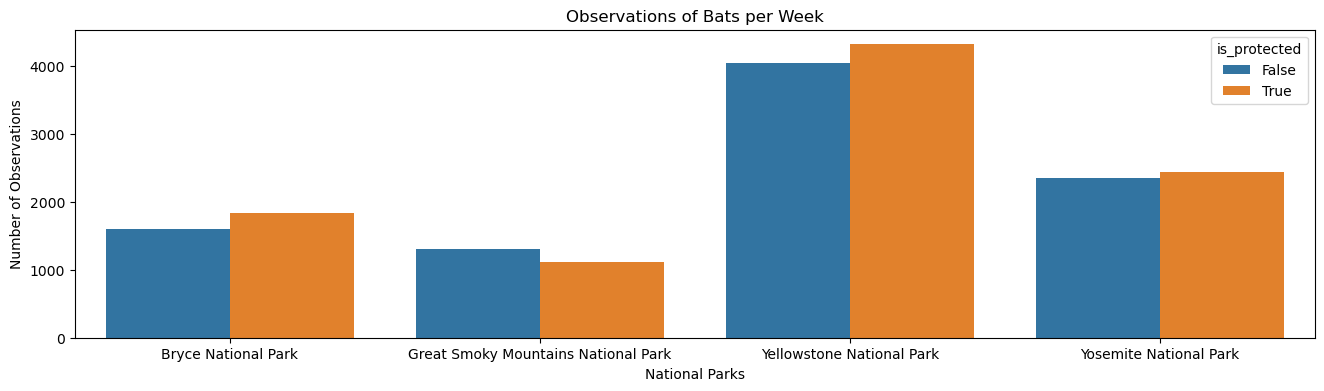

In [432]:
plt.figure(figsize=(16,4))
sns.barplot(obs_by_park, x='park_name', y='observations', hue='is_protected')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()
plt.close()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.


## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 